<a href="https://colab.research.google.com/github/hatkiet/Project_4/blob/Fara_branch/Neural_Network_ready_for_ML_data_MinMax.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Import required libraries and dependencies
import warnings
warnings.simplefilter(action='ignore')
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,accuracy_score,roc_curve,classification_report
from google.colab import files
import io
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf
from tensorflow.keras import Sequential, layers

In [2]:
# Upload a file from the local filesystem using Google Colab's file upload interface
uploaded_file = files.upload()

Saving ready_for_ML.csv to ready_for_ML (1).csv


In [3]:
# Extract the list of uploaded file names and display them
files_uploaded = list(uploaded_file.keys())
files_uploaded

['ready_for_ML (1).csv']

In [4]:
# Read the uploaded CSV file into a pandas DataFrame
df = pd.read_csv(io.BytesIO(uploaded_file[files_uploaded[0]]))
df

,HadHeartAttack,HadAngina,BMI,WeightInKilograms,HeightInMeters,SleepHours,PhysicalHealthDays,MentalHealthDays,0,1,...,10,11,12,13,14,15,16,17,18,19
0,0,0,0.174238,0.205047,0.526667,0.217391,0.066667,0.000000,0.299462,0.950849,...,-0.099028,-0.378523,0.237713,0.135909,-0.550443,0.239727,-0.692767,-0.142871,0.220378,-0.065139
1,0,1,0.177975,0.235281,0.580000,0.217391,0.833333,0.833333,1.284116,0.250684,...,-0.301172,0.117805,0.810911,-0.615670,0.078699,0.406314,0.372265,-0.595649,-0.649020,0.112987
2,0,0,0.094827,0.119308,0.493333,0.391304,0.000000,0.000000,1.021532,-0.393932,...,0.336238,-0.344361,-0.029008,0.177730,0.135457,1.402311,0.484649,-0.081687,0.080468,-0.445365
3,0,0,0.169333,0.159658,0.440000,0.260870,0.000000,0.000000,0.181212,-0.175387,...,-0.686082,0.174988,0.114059,0.631223,0.002017,-0.361410,-0.169800,0.016344,0.067540,-0.507355
4,0,0,0.209389,0.218496,0.493333,0.260870,1.000000,0.000000,2.199740,-0.269413,...,-0.151642,0.152514,-0.030586,0.493116,-0.797308,0.364609,-0.097744,0.023174,0.187206,0.745603
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71672,1,0,0.249445,0.352922,0.646667,0.304348,0.000000,0.000000,-0.776192,0.418818,...,0.251024,0.091648,0.759909,0.239875,-0.089833,-0.483558,0.125815,0.854172,-0.268939,0.212102
71673,1,1,0.149364,0.198303,0.560000,0.260870,0.000000,0.333333,-0.648364,0.518051,...,0.740028,-0.118615,-0.071544,-0.534742,-0.250587,0.204813,0.922011,-0.102018,-0.541200,0.276456
71674,1,1,0.249445,0.352922,0.646667,0.130435,0.233333,1.000000,-0.442230,0.464269,...,0.792165,-0.528490,-0.157986,-0.186692,-0.118329,0.702057,-0.148489,-0.034308,0.292328,0.904889
71675,1,0,0.286348,0.356293,0.593333,0.217391,0.000000,0.000000,0.664766,0.874313,...,0.796875,-0.524017,0.360618,-0.076967,0.253116,0.972921,0.188154,-0.054286,0.822636,-0.433597


In [5]:
# Split data into features (X) and target variable (y)
X = df.drop(columns="HadHeartAttack")
y = df["HadHeartAttack"]

In [6]:
# Display the first 5 values of the target variable to check the data
y[:5]

0    0
1    0
2    0
3    0
4    0
Name: HadHeartAttack, dtype: int64

In [7]:
# Initialize the MinMaxScaler to scale the features to a range between 0 and 1
scaler = MinMaxScaler()
X_scaled  =scaler.fit_transform(X)

In [8]:
# Split the dataset into training and testing sets
xtrain,xtest,ytrain,ytest = train_test_split(X,y, test_size=0.3, stratify=y, shuffle=True)

In [9]:
# Initialize a new sequential model using Keras
model = Sequential()

In [10]:
# Get the number of columns/features in the dataset
len(X.columns)

27

In [11]:
# Get the number of features/columns in the training dataset
xtrain.shape[1]

27

In [12]:
# Add layers to the neural network model
# The first layer is a dense layer with a number of units equal to the number of features in the dataset
# The input shape is specified as the number of features in the training dataset, and the activation function is ReLU
model.add(layers.Dense(len(X.columns), input_shape =(xtrain.shape[1],), activation ="relu"))
# Add a second dense layer with 42 units
model.add(layers.Dense(42))
# Add a third dense layer with 21 units
model.add(layers.Dense(21))
# Add an output dense layer with 1 unit and a sigmoid activation function
# This layer is used for binary classification
model.add(layers.Dense(1, activation ="sigmoid"))

In [13]:
# Print a summary of the model architecture
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 27)                756       
                                                                 
 dense_1 (Dense)             (None, 42)                1176      
                                                                 
 dense_2 (Dense)             (None, 21)                903       
                                                                 
 dense_3 (Dense)             (None, 1)                 22        
                                                                 
Total params: 2857 (11.16 KB)
Trainable params: 2857 (11.16 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [14]:
# Compile the model with the specified settings
model.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])

In [15]:
# Train the model on the training data
history = model.fit(xtrain,ytrain,batch_size=100,epochs=100, validation_split=0.2)

Epoch 1/100
402/402 [==============================] - 3s 4ms/step - loss: 0.3686 - accuracy: 0.8418 - val_loss: 0.3396 - val_accuracy: 0.8612
Epoch 2/100
402/402 [==============================] - 2s 4ms/step - loss: 0.3357 - accuracy: 0.8637 - val_loss: 0.3347 - val_accuracy: 0.8636
Epoch 3/100
402/402 [==============================] - 2s 5ms/step - loss: 0.3330 - accuracy: 0.8654 - val_loss: 0.3327 - val_accuracy: 0.8626
Epoch 4/100
402/402 [==============================] - 1s 3ms/step - loss: 0.3314 - accuracy: 0.8656 - val_loss: 0.3326 - val_accuracy: 0.8614
Epoch 5/100
402/402 [==============================] - 1s 3ms/step - loss: 0.3302 - accuracy: 0.8668 - val_loss: 0.3311 - val_accuracy: 0.8628
Epoch 6/100
402/402 [==============================] - 1s 3ms/step - loss: 0.3287 - accuracy: 0.8668 - val_loss: 0.3321 - val_accuracy: 0.8624
Epoch 7/100
402/402 [==============================] - 1s 3ms/step - loss: 0.3283 - accuracy: 0.8667 - val_loss: 0.3320 - val_accuracy: 0.8619

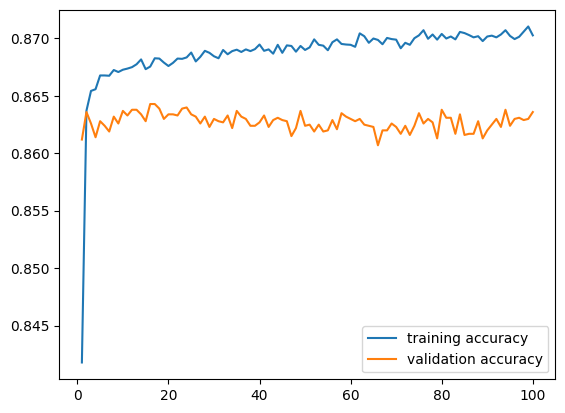

In [16]:
# Extract the training accuracy, validation accuracy, training loss, and validation loss from the training history
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1,len(acc)+1)
plt.plot(epochs,acc,label = 'training accuracy')
plt.plot(epochs,val_acc,label = 'validation accuracy')
plt.legend()
plt.show()

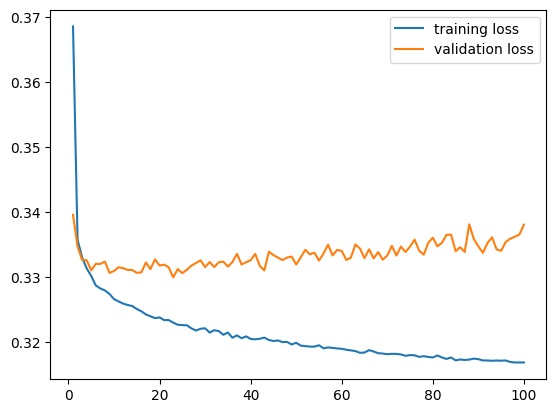

In [17]:
# Generate a range of epoch numbers corresponding to the length of the loss list
epochs = range(1,len(acc)+1)
plt.plot(epochs,loss,label = 'training loss')
plt.plot(epochs,val_loss,label = 'validation loss')
plt.legend()
plt.show()

In [18]:
# Using the trained model to make predictions on the test set
y_hat = model.predict(xtest)

672/672 [==============================] - 2s 2ms/step


In [19]:
# Convert the predicted probabilities to binary class labels (0 or 1)
y_pres = (y_hat > 0.5).astype(int).flatten()

In [20]:
# Print the classification report to evaluate the performance of the model on the test set
print(classification_report(ytest,y_pres))

              precision    recall  f1-score   support

           0       0.89      0.94      0.92     16851
           1       0.74      0.57      0.64      4653

    accuracy                           0.86     21504
   macro avg       0.81      0.76      0.78     21504
weighted avg       0.86      0.86      0.86     21504



In [24]:
# Compute confusion matrix
confusion_matrix = tf.math.confusion_matrix(ytest, y_pres)

# Print the confusion matrix
print('Confusion Matrix:')
print(confusion_matrix.numpy())

Confusion Matrix:
[[15910   941]
 [ 1995  2658]]
